In [1]:
%store -r X_train X_test y_train y_test sc

In [2]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [3]:
y_pred = classifier.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B'], dtype=object)

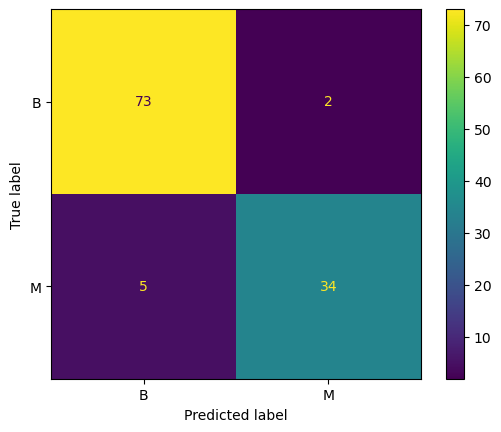

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
display = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
display.plot()

In [5]:
accuracy_score(y_test, y_pred)*100

93.85964912280701

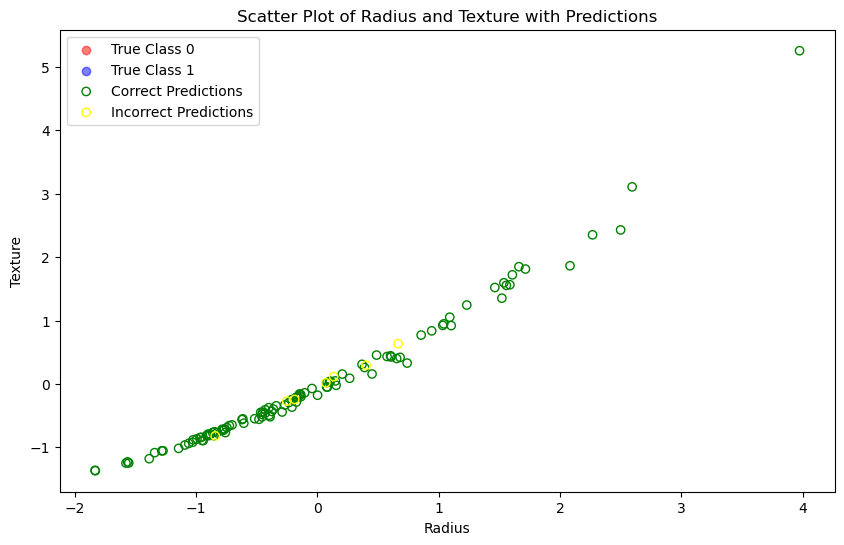

In [6]:
import matplotlib.pyplot as plt

X_train_radius_texture = X_train[:, [2, 3]]
X_test_radius_texture = X_test[:, [2, 3]]


plt.figure(figsize=(10, 6))

# Plot the true positive class
plt.scatter(X_test_radius_texture[y_test == 0, 0], X_test_radius_texture[y_test == 0, 1],
            color='red', label='True Class 0', alpha=0.5)

# Plot the true negative class
plt.scatter(X_test_radius_texture[y_test == 1, 0], X_test_radius_texture[y_test == 1, 1],
            color='blue', label='True Class 1', alpha=0.5)

# Overlaying the predictions
correct_predictions = (y_test == y_pred)
incorrect_predictions = ~correct_predictions

# Correct predictions
plt.scatter(X_test_radius_texture[correct_predictions, 0], X_test_radius_texture[correct_predictions, 1],
            edgecolor='green', facecolors='none', label='Correct Predictions')

# Incorrect predictions
plt.scatter(X_test_radius_texture[incorrect_predictions, 0], X_test_radius_texture[incorrect_predictions, 1],
            edgecolor='yellow', facecolors='none', label='Incorrect Predictions')

plt.xlabel('Radius')
plt.ylabel('Texture')
plt.title('Scatter Plot of Radius and Texture with Predictions')
plt.legend()
plt.show()

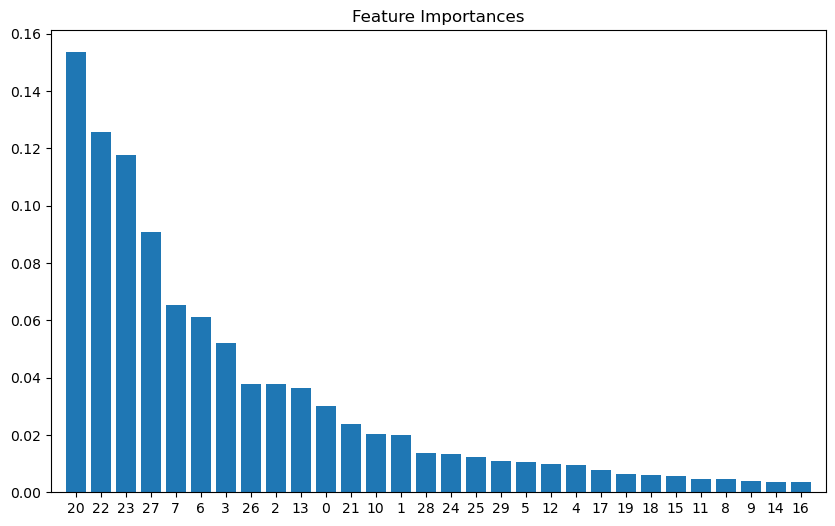

In [7]:
import numpy as np
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


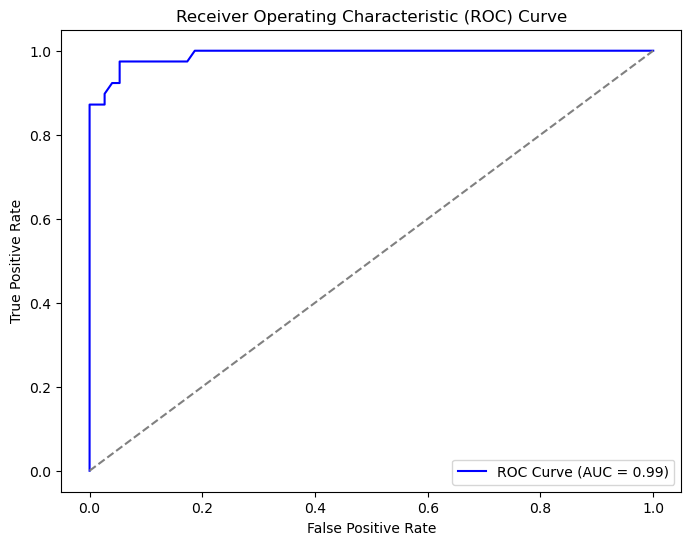

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="M")
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
